In [1]:

import numpy as np
import pandas as pd

from DataAnalysisClass import *
from clustering_work import *
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized + double + double_polarized


In [2]:
csv_path = Path("csv")
csv_path.mkdir(exist_ok=True)
beta_hrs_error_path = csv_path.joinpath('beta_hrs_error.csv')
beta_para_error_path = csv_path.joinpath('beta_parallel_error.csv')
beta_hrs_path = csv_path.joinpath('beta_hrs.csv')
beta_para_path = csv_path.joinpath('beta_parallel.csv')
beta_path = csv_path.joinpath('beta_ijk.csv')


In [3]:

paper_path = Path('beta_figures')



In [4]:
#read first column as index 
beta_hrs = pd.read_csv(beta_hrs_path, index_col=0)
beta_df = pd.read_csv(beta_path, index_col=0)
# glob for .mol files in august molecules directory


In [5]:
beta_df

,Afreq,Bfreq,Cfreq,ijk,basis,molecule,Beta,a,b,c
0,0.0000,0.0000,0.0000,XXX,MRA,FNO,-5.899730,0,0,0
1,0.0000,0.0000,0.0000,XYY,MRA,FNO,-2.972730,0,0,0
2,0.0000,0.0000,0.0000,YXY,MRA,FNO,-2.972730,0,0,0
3,0.0000,0.0000,0.0000,YYX,MRA,FNO,-2.972730,0,0,0
4,0.0000,0.0000,0.0000,XYZ,MRA,FNO,-0.000220,0,0,0
...,...,...,...,...,...,...,...,...,...,...
655635,0.0974,0.0325,0.0649,YZZ,d-aug-cc-pCVQZ,LiBH4,-0.002181,6,2,4
655636,0.0974,0.0325,0.0649,ZZZ,d-aug-cc-pCVQZ,LiBH4,63.774400,6,2,4
655637,0.1136,0.0487,0.0649,XZZ,d-aug-cc-pCVQZ,LiBH4,-0.003208,7,3,4
655638,0.1136,0.0487,0.0649,YZZ,d-aug-cc-pCVQZ,LiBH4,-0.003026,7,3,4


In [6]:
# if Beta < threshold, set Beta to 0
thresh = 1e-4
beta_df['Beta'] = beta_df['Beta'].apply(lambda x: 0 if np.abs(x) < thresh else x)

In [7]:
class MRAComparedBasisDF(pd.DataFrame):
    def __init__(self, polar_data, index, values: list, PercentError: bool, *args, **kwargs):
        # Use the special_parameter to modify the DataFrame or perform additional initialization
        basis_data = polar_data.query('basis!="MRA"').copy()
        basis_data = basis_data.set_index(index)

        for value in values:
            basis_data[f'{value}MRA'] = polar_data.query('basis=="MRA"').set_index(index)[
                value]
            if PercentError:
                basis_data[f'{value}E'] = (
                            (basis_data[value] - basis_data[f'{value}MRA']) / basis_data[f'{value}MRA'] * 100)
            else:
                basis_data[f'{value}E'] = (basis_data[value] - basis_data[f'{value}MRA'])
        basis_data = basis_data.reset_index()
        # create a column of percent error in alpha
        basis_data = make_detailed_df(basis_data)
        super().__init__(basis_data, *args, **kwargs)

In [8]:
beta_basis_error_df = MRAComparedBasisDF(beta_df, index=['molecule', 'ijk', 'b', 'c', ], values=['Beta'],
                                         PercentError=True)

['D', 'T', 'Q', '5']


In [9]:
beta_hrs_error_df = pd.read_csv(beta_hrs_error_path, index_col=0)

In [10]:
beta_hrs_error_df

,b,c,molecule,basis,Beta,beta_MRA,betaE,augmentation,polarization,mol_system,valence,Type
0,0,0,BF,aug-cc-pCVDZ,25.115272,28.239003,-11.061760,aug,CV,Fluorine,D,aug-cc-pCVnZ
1,0,0,BH2Cl,aug-cc-pCVDZ,33.935421,21.951127,54.595344,aug,CV,Second-row,D,aug-cc-pCVnZ
2,0,0,BH2F,aug-cc-pCVDZ,25.310664,25.259990,0.200610,aug,CV,Fluorine,D,aug-cc-pCVnZ
3,0,0,BH3,aug-cc-pCVDZ,6.851658,6.652353,2.996004,aug,CV,First-row,D,aug-cc-pCVnZ
4,0,0,BHF2,aug-cc-pCVDZ,17.548499,16.937269,3.608793,aug,CV,Fluorine,D,aug-cc-pCVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...
22178,4,4,NaCN,d-aug-cc-pVTZ,106.175031,98.883580,7.373773,d-aug,V,Second-row,T,d-aug-cc-pVnZ
22184,4,4,OF2,d-aug-cc-pVTZ,2.163086,2.155624,0.346171,d-aug,V,Fluorine,T,d-aug-cc-pVnZ
22187,4,4,PH3O,d-aug-cc-pVTZ,55.129263,70.860857,-22.200682,d-aug,V,Second-row,T,d-aug-cc-pVnZ
22192,4,4,SiH3Cl,d-aug-cc-pVTZ,33.140406,31.592541,4.899463,d-aug,V,Second-row,T,d-aug-cc-pVnZ


In [11]:

def plot_basis_molecule_convergence(df, mol, vlevel):
    plot_data = df.query('molecule==@mol and b==c and valence.isin(@vlevel)').copy()
    plot_data['omega'] = plot_data['b']
    o = plot_data.omega.unique()
    mra = plot_data.beta_MRA.unique()
    mra_data = pd.DataFrame({'omega': o, 'beta_MRA': mra})

    pal = 'magma'

    plot_data.valence = plot_data.valence.astype('category')
    plot_data.valence = plot_data.valence.cat.remove_unused_categories()
    num_valence_levels = len(plot_data.valence.unique())
    vlevel = vlevel[:num_valence_levels]

    plot_data.valence = plot_data.valence.cat.reorder_categories(vlevel, ordered=True)

    plot_data.omega = plot_data.omega.astype('category')
    plot_data.omega = plot_data.omega.cat.remove_unused_categories()

    type_order = ['aug-cc-pVnZ', 'aug-cc-pCVnZ', 'd-aug-cc-pVnZ', 'd-aug-cc-pCVnZ']
    # create an omega column 
    g = sns.FacetGrid(data=plot_data, col='Type', col_order=type_order, sharey=True, sharex=False, height=6, aspect=.5,
                      despine=False)
    g.map_dataframe(sns.lineplot, x='valence', y='Beta', hue='omega', alpha=.5, palette=pal, lw=1,
                    legend=True)
    g.map_dataframe(sns.scatterplot, x='valence', y='Beta', hue='omega', alpha=.95, palette=pal, s=100)

    mra_colors = sns.color_palette(pal, n_colors=len(o))
    for ax in g.axes.flat:
        for i, beta in enumerate(mra_data.beta_MRA):
            ax.axhline(beta, color=mra_colors[i], linestyle='--', label='MRA', alpha=.7)
        ax.patch.set_alpha(0.3)

    g.add_legend(title='Frequency', loc='center left', bbox_to_anchor=(1, 0.5))

    g.figure.tight_layout()
    return g


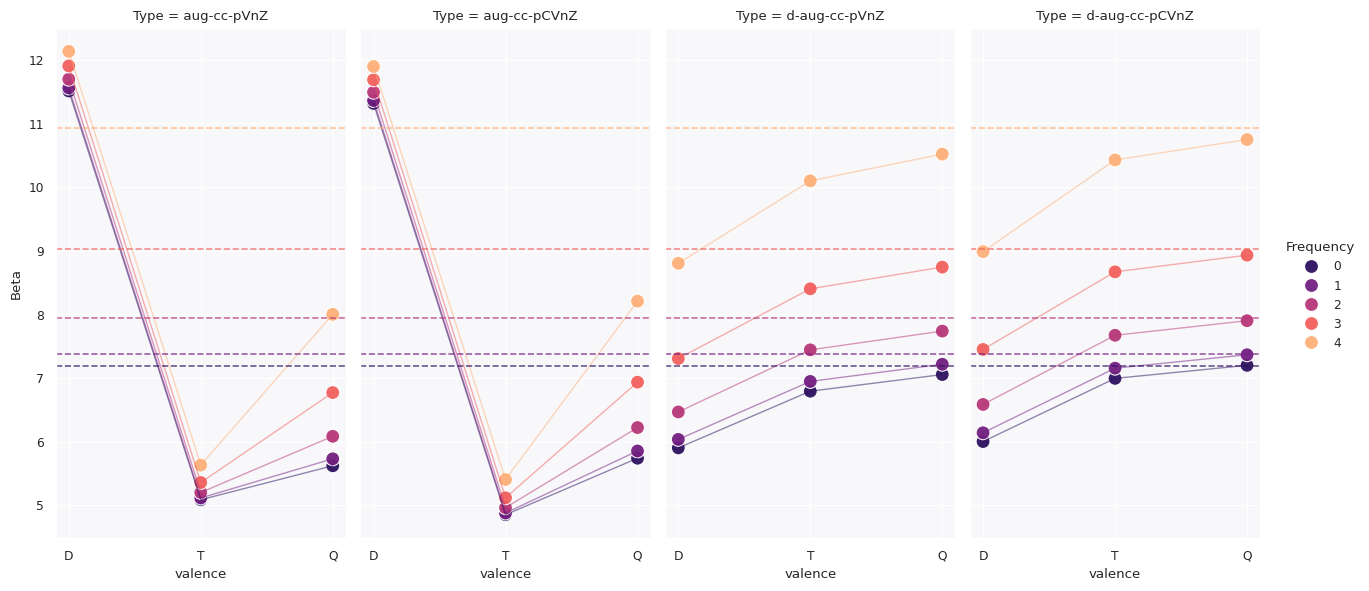

In [12]:
# These values are plotted at values where beta == c therefore the outgoing frequency is 2*omega
plot_basis_molecule_convergence(beta_hrs_error_df, 'CH3Cl', ['D', 'T', 'Q', '5'])

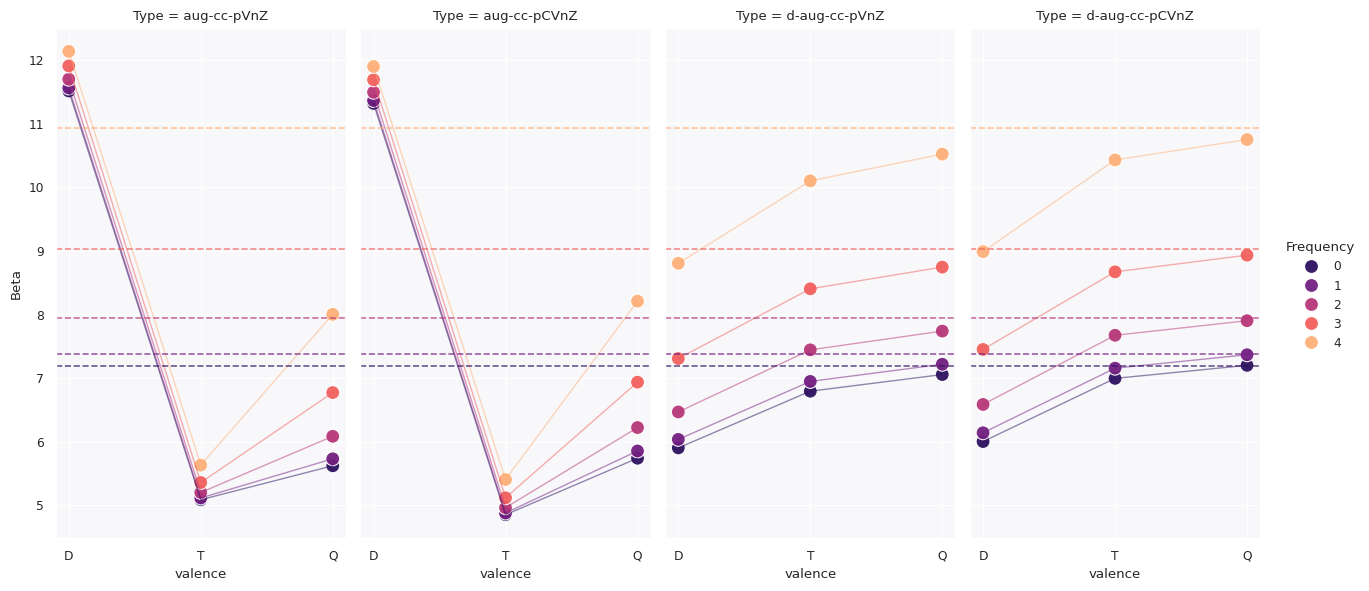

In [13]:
beta_hrs_error_df.query('molecule=="HCl"').query('b==c')
plot_basis_molecule_convergence(beta_hrs_error_df, 'CH3Cl', ['D', 'T', 'Q', '5'])


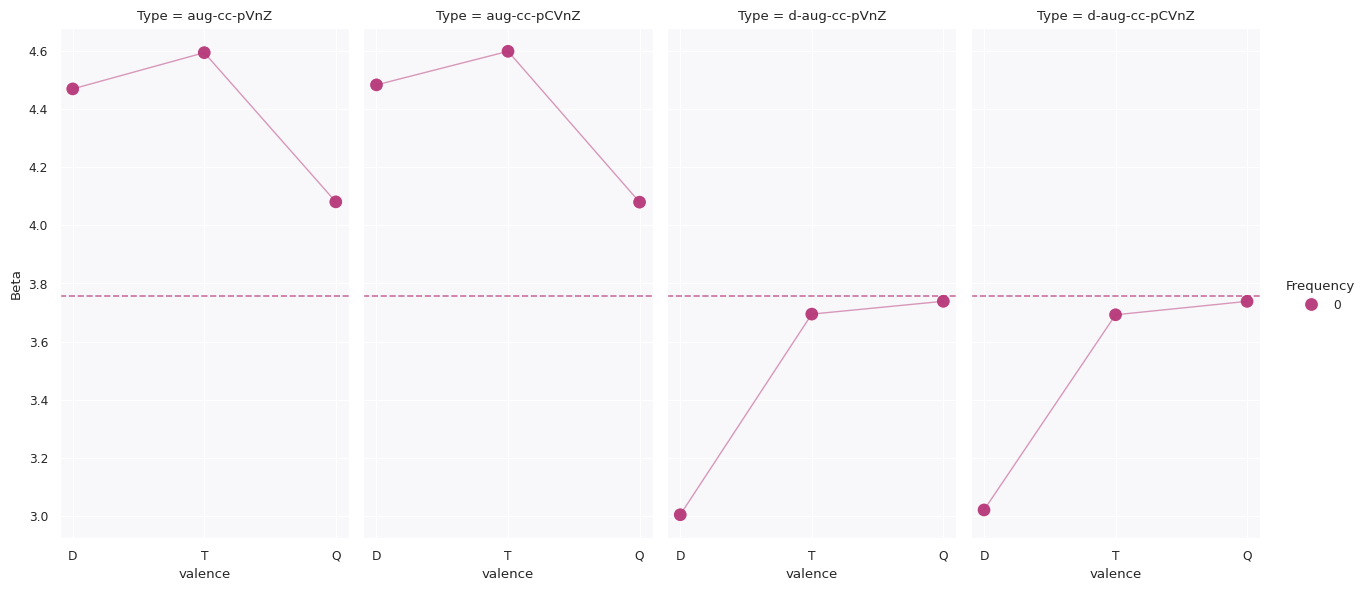

In [14]:

plot_basis_molecule_convergence(beta_hrs_error_df, 'HF', ['D', 'T', 'Q', '5'])


In [15]:
mol_ = "HF"
beta_df.query('ijk=="XXX" and molecule== @mol_ and basis=="MRA"')

,Afreq,Bfreq,Cfreq,ijk,basis,molecule,Beta,a,b,c
6156,0.0000,0.0,0.0000,XXX,MRA,HF,0.000000,0,0,0
6183,0.0269,0.0,0.0269,XXX,MRA,HF,0.000000,1,0,1
6210,0.0537,0.0,0.0537,XXX,MRA,HF,0.000000,2,0,2
6237,0.0806,0.0,0.0806,XXX,MRA,HF,0.000103,3,0,3
6264,0.1075,0.0,0.1075,XXX,MRA,HF,0.000136,4,0,4
6291,0.1343,0.0,0.1343,XXX,MRA,HF,0.000000,5,0,5
6318,0.1612,0.0,0.1612,XXX,MRA,HF,0.000000,6,0,6


In [16]:
hf_beta_path = Path("/home/ahurta92/data/beta_paper_database/hf/HF/beta.json")


In [17]:

def read_mra_beta(json_file, mol_name):
    json = pd.read_json(json_file)
    beta_df = pd.DataFrame.from_dict(json)
    # rename A-freq B-freq C-freq to Afreq Bfreq Cfreq
    beta_df.rename(columns={'A-freq': 'Afreq', 'B-freq': 'Bfreq', 'C-freq': 'Cfreq'}, inplace=True)
    # round Afreq Bfreq Cfreq to 3 decimal places
    beta_df.Afreq = beta_df.Afreq.round(3)
    beta_df.Bfreq = beta_df.Bfreq.round(3)
    beta_df.Cfreq = beta_df.Cfreq.round(3)
    # combine A-freq B-freq C-freq to ijk
    beta_df['ijk'] = beta_df['A'].astype(str) + beta_df['B'].astype(str) + beta_df['C'].astype(str)
    beta_df = beta_df.drop(columns=['A', 'B', 'C'])
    # set basis name to MRA
    beta_df['basis'] = 'MRA'
    beta_df['molecule'] = mol_name

    #beta_df = beta_df.set_index('molecule')
    #beta_df = beta_df.reset_index()
    return beta_df


hf_beta_df = read_mra_beta(hf_beta_path, 'H2O')
hf_beta_df.Afreq.unique()

array([0.   , 0.027, 0.054, 0.081, 0.107, 0.134, 0.161])

In [18]:
h2_path = Path("/home/ahurta92/data/may2024/output/H2O/output/beta.json")
h2o_mra_old = Path("/home/ahurta92/data/beta_paper_database/hf/H2O/beta.json")
mra_data = read_mra_beta(h2o_mra_old, 'H2O')
mra_data.ijk.unique()



array(['XXX', 'XXY', 'XXZ', 'XYY', 'XYZ', 'XZZ', 'YXX', 'YXY', 'YXZ',
       'YYY', 'YYZ', 'YZZ', 'ZXX', 'ZXY', 'ZXZ', 'ZYY', 'ZYZ', 'ZZZ'],
      dtype=object)

In [19]:

# read into dict
import json

h2O_nosym = "/home/ahurta92/data/august_no_symmetry/dalton/hf/H2O/dipole/quad_H2O-d-aug-cc-pV5Z.json"
basis_data_path = Path("/home/ahurta92/data/beta_paper_database/dalton/hf/H2O/dipole/quad_H2O-d-aug-cc-pCVQZ.json")

In [20]:
def read_basis_quad(json_file):
    with open(json_file) as json_file:
        json_file = json_file.read()
        json_file = json.loads(json_file)
    basis_data = pd.DataFrame.from_dict(json_file['Quad'])
    basis_data.rename(columns={'A-freq': 'Afreq', 'B-freq': 'Bfreq', 'C-freq': 'Cfreq'}, inplace=True)
    # round Afreq Bfreq Cfreq to 3 decimal places
    basis_data.Afreq = basis_data.Afreq.round(3)
    basis_data.Bfreq = basis_data.Bfreq.round(3)
    basis_data.Cfreq = basis_data.Cfreq.round(3)
    # combine A-freq B-freq C-freq to ijk
    basis_data['ijk'] = basis_data['A'].astype(str) + basis_data['B'].astype(str) + basis_data['C'].astype(str)
    basis_data = basis_data.drop(columns=['A', 'B', 'C'])
    # set basis name to MRA
    # rename Beta Value to Beta 
    basis_data.rename(columns={'Beta Value': 'Beta'}, inplace=True)
    # set the index to molecule,basis,ijk,Afreq,Bfreq,Cfreq
    #basis_data.set_index(['molecule','basis','ijk','Afreq','Bfreq','Cfreq'], inplace=True)
    #basis_data['Beta'] = basis_data['Beta'].apply(lambda x: x if isinstance(x, float) else np.nan)

    return basis_data


basis_data = read_basis_quad(h2O_nosym)


In [21]:
# isolate only float data in Beta if not a float set to NaN

h2o_5z = "/home/ahurta92/data/august_no_symmetry/dalton/hf/H2O/dipole/quad_H2O-d-aug-cc-pV5Z.json"
h2o_pc = Path("/home/ahurta92/data/august_no_symmetry/dalton/hf/H2O/dipole/quad_H2O-d-aug-cc-pCVQZ.json")
basis_data = read_basis_quad(h2o_5z)

In [22]:
def query_basis_data(basis_data, b_index, c_index):
    a = basis_data.Afreq.unique()
    b = basis_data.Bfreq.unique()
    a_index = b_index + c_index
    return basis_data.query('Afreq==@a[@a_index] and Bfreq==@b[@b_index] and Cfreq==@b[@c_index]').dropna()


In [24]:
query_basis_data(basis_data, 2, 1, )

,Afreq,Bfreq,Cfreq,Beta,molecule,basis,ijk
54,-0.06,0.04,0.02,-0.0,H2O,d-aug-cc-pV5Z,XXX
55,-0.06,0.04,0.02,0.000296,H2O,d-aug-cc-pV5Z,YXX
56,-0.06,0.04,0.02,1.366141,H2O,d-aug-cc-pV5Z,ZXX
69,-0.06,0.04,0.02,0.00027,H2O,d-aug-cc-pV5Z,XYX
70,-0.06,0.04,0.02,-0.0,H2O,d-aug-cc-pV5Z,YYX
71,-0.06,0.04,0.02,0.0,H2O,d-aug-cc-pV5Z,ZYX
84,-0.06,0.04,0.02,1.453733,H2O,d-aug-cc-pV5Z,XZX
85,-0.06,0.04,0.02,0.0,H2O,d-aug-cc-pV5Z,YZX
86,-0.06,0.04,0.02,-0.0,H2O,d-aug-cc-pV5Z,ZZX
282,-0.06,0.04,0.02,"beta(X,Y,X)",H2O,d-aug-cc-pV5Z,XXY


In [25]:
mol = "HCONH2"
basis_path = Path(
    "/home/ahurta92/data/august_no_symmetry/dalton/hf/{}/dipole/quad_{}-d-aug-cc-pVQZ.json".format(mol, mol))
basis_data = read_basis_quad(basis_path)

In [26]:

def reconstruct_full_beta_ijk(freq_data):
    ex = freq_data.copy()
    ex['equal_ijk'] = freq_data['Beta'].apply(lambda x: str(x) if not isinstance(x, float) else str(None))
    ex['equal_ijk'] = ex['equal_ijk'].apply(lambda x: (''.join(x[5:-1].split(','))) if str(None) else str(None))
    ex.set_index('ijk', inplace=True)
    for index, row in ex.iterrows():
        if row.equal_ijk != str():
            ex.at[index, 'Beta'] = ex.at[row.equal_ijk, 'Beta']
    ex.reset_index(inplace=True)
    ex.drop(columns='equal_ijk', inplace=True)
    return ex


def read_basis_quad(json_file):
    with open(json_file) as json_file:
        json_file = json_file.read()
        json_file = json.loads(json_file)
    basis_data = pd.DataFrame.from_dict(json_file['Quad'])
    basis_data.rename(columns={'A-freq': 'Afreq', 'B-freq': 'Bfreq', 'C-freq': 'Cfreq'}, inplace=True)
    # round Afreq Bfreq Cfreq to 3 decimal places
    basis_data.Afreq = basis_data.Afreq.round(3)
    basis_data.Bfreq = basis_data.Bfreq.round(3)
    basis_data.Cfreq = basis_data.Cfreq.round(3)
    # combine A-freq B-freq C-freq to ijk
    basis_data['ijk'] = basis_data['A'].astype(str) + basis_data['B'].astype(str) + basis_data['C'].astype(str)
    basis_data = basis_data.drop(columns=['A', 'B', 'C'])
    # rename Beta Value to Beta 
    basis_data.rename(columns={'Beta Value': 'Beta'}, inplace=True)
    bfreqs = basis_data.Bfreq.unique()
    cfreqs = basis_data.Cfreq.unique()

    ex = basis_data.copy()
    ex['equal_ijk'] = ex['Beta'].apply(lambda x: str(x) if not isinstance(x, float) else str(None))
    ex['equal_ijk'] = ex['equal_ijk'].apply(lambda x: (''.join(x[5:-1].split(','))) if str(None) else str(None))
    ex.set_index(['ijk','Bfreq','Cfreq'], inplace=True)
    ex.sort_index(inplace=True)
    ex=ex[~ex.index.duplicated(keep='first')]
    for index, row in ex.iterrows():
        if row.equal_ijk != str():
            # create new index = to equal_ijk,Cfreq,Bfreq
            new_index= (row.equal_ijk, index[2], index[1])
            ex.loc[index,'Beta'] = ex.loc[new_index,'Beta']
    ex.reset_index(inplace=True)
    ex.drop(columns='equal_ijk', inplace=True)
    return ex
    



basis_data = read_basis_quad(h2O_nosym)


In [70]:
mol = "H2O"
basis_path = Path(
    "/home/ahurta92/data/august_no_symmetry/dalton/hf/{}/dipole/quad_{}-d-aug-cc-pV5Z.json".format(mol, mol))
basis_data = read_basis_quad(basis_path)
query_basis_data(basis_data,0,0).sort_values('Beta').query('Beta>1e-3').set_index('ijk').Beta

ijk
ZZY    0.001078
ZYZ    0.001078
YZZ    0.001078
XXZ    1.345484
ZXX    1.345484
XZX    1.345484
ZZZ    7.686958
ZYY    9.425497
YYZ    9.425497
YZY    9.425497
Name: Beta, dtype: object

In [67]:
h2o_mra_path = Path("/home/ahurta92/data/may2024/output/H2O/output/beta.json")
h2O_mra = read_mra_beta(h2o_mra_path, 'H2O')
        #ex.at[index, 'Beta'] = ex.at[row.equal_ijk, 'Beta']

In [72]:
query_basis_data(h2O_mra, 0, 0).sort_values('Beta').query('Beta>1e-3').set_index('ijk').Beta

ijk
XXX    0.002191
XXZ    1.350104
ZZZ    7.707024
YYZ    9.430078
Name: Beta, dtype: float64

In [36]:
h2O_mra

,Afreq,Bfreq,Cfreq,Beta,ijk,basis,molecule
0,0.000,0,0.000,0.000043,XXX,MRA,H2O
1,0.000,0,0.000,-0.000034,XXY,MRA,H2O
2,0.000,0,0.000,-0.458684,XXZ,MRA,H2O
3,0.000,0,0.000,0.000018,XYY,MRA,H2O
4,0.000,0,0.000,-0.000011,XYZ,MRA,H2O
...,...,...,...,...,...,...,...
121,0.161,0,0.161,-0.000084,ZXY,MRA,H2O
122,0.161,0,0.161,-0.000056,ZXZ,MRA,H2O
123,0.161,0,0.161,-0.474710,ZYY,MRA,H2O
124,0.161,0,0.161,0.000374,ZYZ,MRA,H2O


In [342]:
ex.at[('XXX',0.0,0.0)]['Beta']


ijk  Bfreq  Cfreq
XXX  0.0    0.0     -0.0
Name: Beta, dtype: object

In [332]:
ex.at[ex.index[0]].Beta


/tmp/ipykernel_8351/3227146207.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ex.at[ex.index[0]].Beta


ijk  Bfreq  Cfreq
XXX  0.0    0.0     -0.0
Name: Beta, dtype: object